# Alzheimer's Disease

This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

# Dataset Feature Overview

Patient ID\
PatientID: A unique identifier assigned to each patient (4751 to 6900).\

Demographic Details\
Age: The age of the patients ranges from 60 to 90 years.\
Gender: Gender of the patients, where 0 represents Male and 1 represents Female.\
Ethnicity: The ethnicity of the patients, coded as follows:\
0: Caucasian\
1: African American\
2: Asian\
3: Other\
EducationLevel: The education level of the patients, coded as follows:\
0: None\
1: High School\
2: Bachelor's\
3: Higher

Lifestyle Factors\
BMI: Body Mass Index of the patients, ranging from 15 to 40.\
Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.\
AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.\
PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.\
DietQuality: Diet quality score, ranging from 0 to 10.\
SleepQuality: Sleep quality score, ranging from 4 to 10.

Medical History\
FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.\
CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.\
Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.\
Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.\
HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.\
Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

Clinical Measurements\
SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.\
DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.\
CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.\
CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.\
CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.\
CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

Cognitive and Functional Assessments
MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.\
FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.\
MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.\
BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.\
ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

Symptoms\
Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.\
Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.\
PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.\
DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.\
Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

Diagnosis Information\
Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

Confidential Information\
DoctorInCharge: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

## Import The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(context='notebook', palette='muted', style='darkgrid')

## Reading DataSet

In [2]:
# Reading Data
data = pd.read_csv("/content/alzheimers_disease_data.csv")
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
data.sample(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
1162,5913,63,0,2,3,17.760098,0,2.520986,0.927284,6.691980,9.539783,1,1,1,0,0,0,111,70,231.551293,131.346659,39.792136,349.549603,21.718570,8.260176,1,0,7.558933,1,0,0,0,0,0,XXXConfid
866,5617,66,0,0,2,24.274355,1,14.016364,6.320907,5.228418,8.451672,0,0,0,1,1,0,106,116,209.264705,88.621165,47.897604,370.893639,28.709078,8.797741,0,0,1.513744,0,0,0,0,0,0,XXXConfid
1743,6494,75,1,0,2,32.517662,0,15.287424,7.372272,9.789646,9.202924,0,0,1,0,0,0,105,104,270.309633,155.640788,67.973728,158.557731,24.079581,7.423687,0,0,5.242490,0,0,0,0,0,0,XXXConfid
822,5573,63,1,0,2,21.318756,0,3.410893,9.792070,9.099210,7.584489,0,0,0,1,0,0,150,114,259.766908,197.313655,26.488223,199.347245,25.541351,4.776327,0,0,2.826997,0,0,1,1,0,0,XXXConfid
1049,5800,90,0,1,3,31.430904,0,0.996496,7.108725,5.328610,4.977538,0,0,0,0,0,0,150,90,239.568370,105.722009,73.973410,130.986256,19.411825,0.880355,0,0,7.805410,0,0,0,0,0,0,XXXConfid
1402,6153,67,1,0,1,27.790551,0,19.029173,5.284802,9.518118,4.736468,0,0,0,0,1,0,179,61,175.638465,95.053903,39.689200,387.212861,22.777818,0.658424,0,0,8.225119,1,0,0,0,1,0,XXXConfid
749,5500,74,1,1,3,15.014659,1,11.647818,1.380752,9.505111,7.106935,1,0,0,1,0,0,178,103,279.967998,72.825245,33.953173,322.404018,3.259244,5.977908,0,1,5.760455,1,1,0,1,1,0,XXXConfid
247,4998,72,0,0,0,32.609131,0,15.580905,4.150035,3.641065,6.613338,0,1,0,1,0,0,114,69,164.757020,153.372131,56.307723,213.686511,21.098861,5.106842,0,0,9.292501,1,0,0,0,0,0,XXXConfid
246,4997,84,1,0,2,37.966976,0,3.682344,2.688289,2.978401,4.137831,0,0,1,0,0,0,139,91,189.549706,184.641138,94.502299,208.007659,18.290064,9.194753,0,1,4.630248,1,1,1,0,1,1,XXXConfid
769,5520,61,0,1,0,19.384607,0,7.003220,1.282160,7.262937,8.414083,0,0,1,0,0,0,113,102,232.102029,67.575043,99.959494,149.575359,5.956131,0.281534,0,0,2.038915,0,0,0,0,0,1,XXXConfid


In [4]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

## Exploratory Data Analysis (EDA)

EDA (Exploratory Data Analysis) is a process that involves understanding the data by calculating statistics and creating visualizations such as charts and figures. The purpose of EDA is to discover patterns, relationships, and anomalies in the data that could have an impact on our analysis.

In [5]:
data.shape

(2149, 35)

In [6]:
# Column Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,2149.0,NaN,NaN,NaN,5825.0,620.507185,4751.0,5288.0,5825.0,6362.0,6899.0
Age,2149.0,NaN,NaN,NaN,74.908795,8.990221,60.0,67.0,75.0,83.0,90.0
Gender,2149.0,NaN,NaN,NaN,0.506282,0.500077,0.0,0.0,1.0,1.0,1.0
Ethnicity,2149.0,NaN,NaN,NaN,0.697534,0.996128,0.0,0.0,0.0,1.0,3.0
EducationLevel,2149.0,NaN,NaN,NaN,1.286645,0.904527,0.0,1.0,1.0,2.0,3.0
BMI,2149.0,NaN,NaN,NaN,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,NaN,NaN,NaN,0.288506,0.453173,0.0,0.0,0.0,1.0,1.0
AlcoholConsumption,2149.0,NaN,NaN,NaN,10.039442,5.75791,0.002003,5.13981,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,NaN,NaN,NaN,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,NaN,NaN,NaN,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [8]:
# To check the number of unique values in each column
num_unique = data.nunique()
num_unique

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

In [9]:
# count the number of duplicate rows
data.duplicated().sum()

0

In [10]:
# count the number of missing values (NaN values) in each column.
data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [11]:
# Drop unnecessary columns from the DataFrame
data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [12]:
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in data.columns if data[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = data.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

### Visualization

#####Distribution of Categorical Features

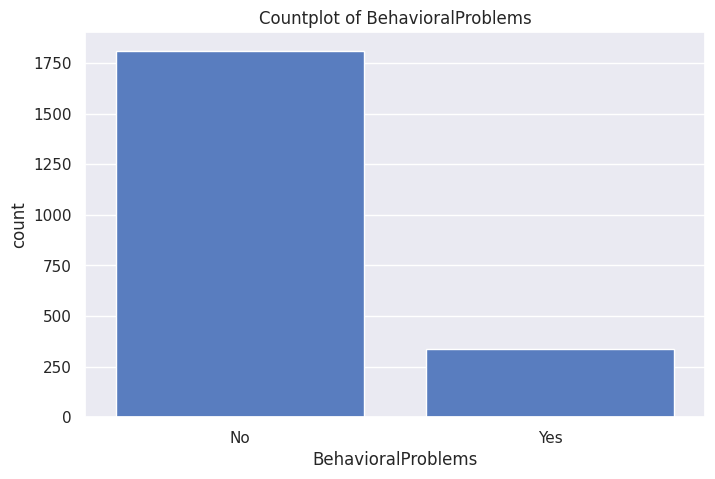

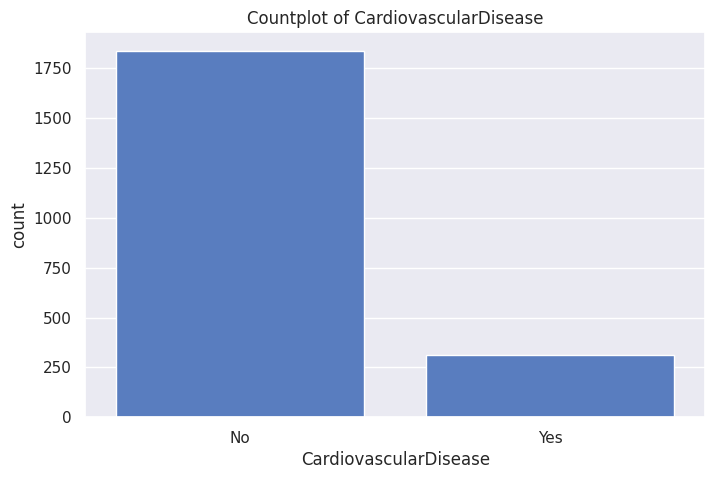

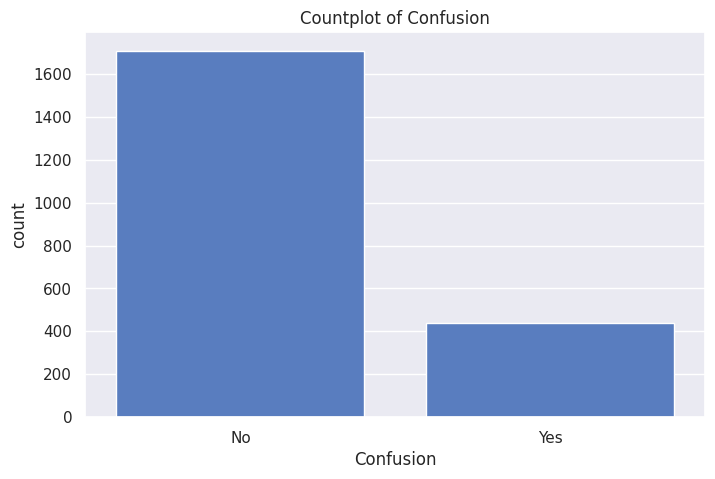

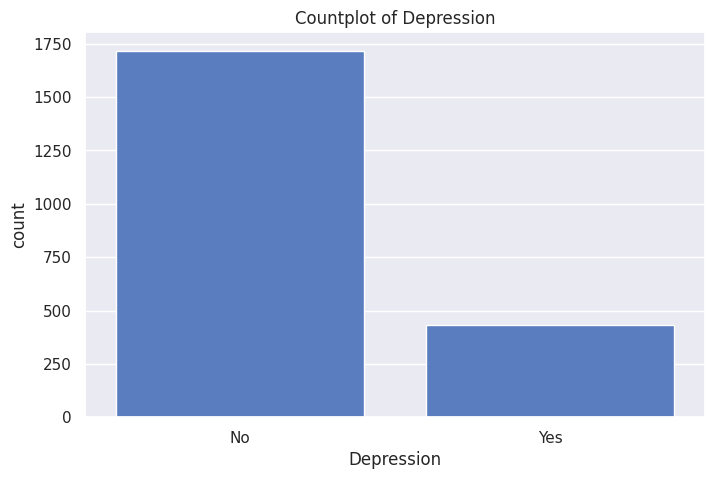

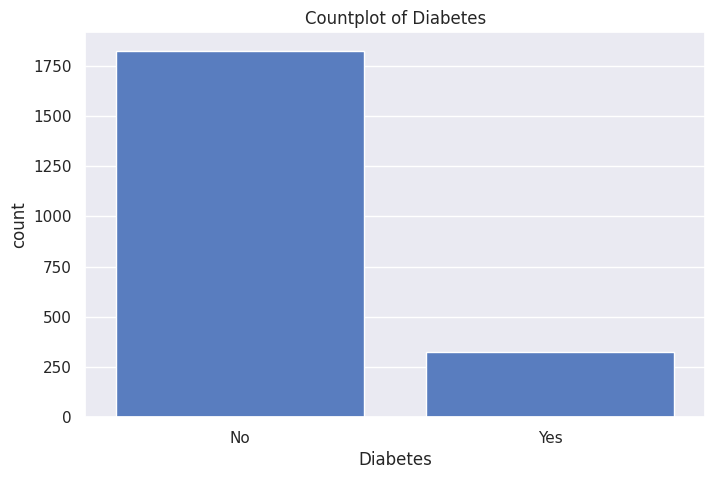

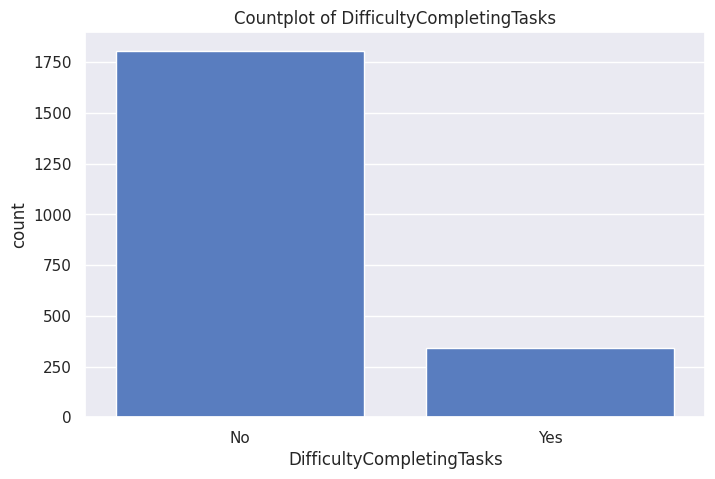

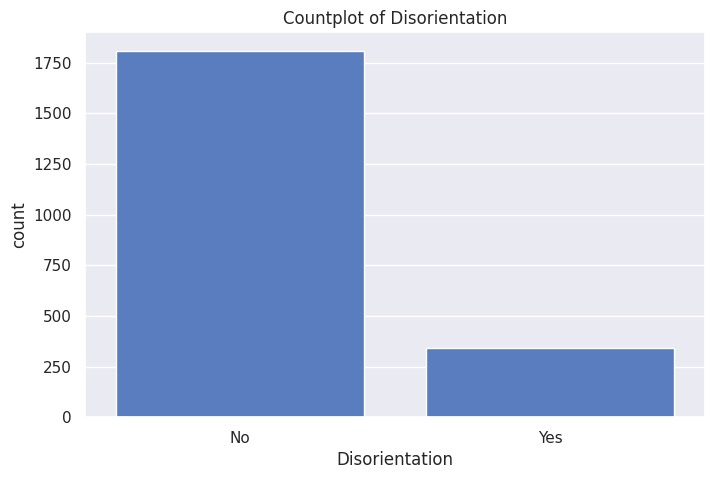

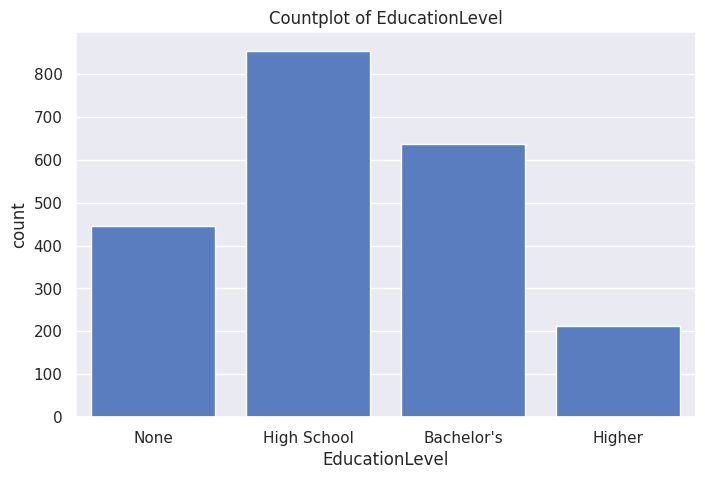

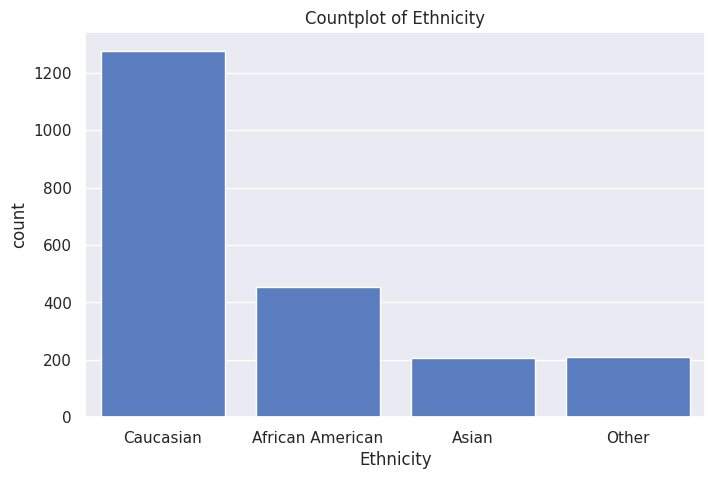

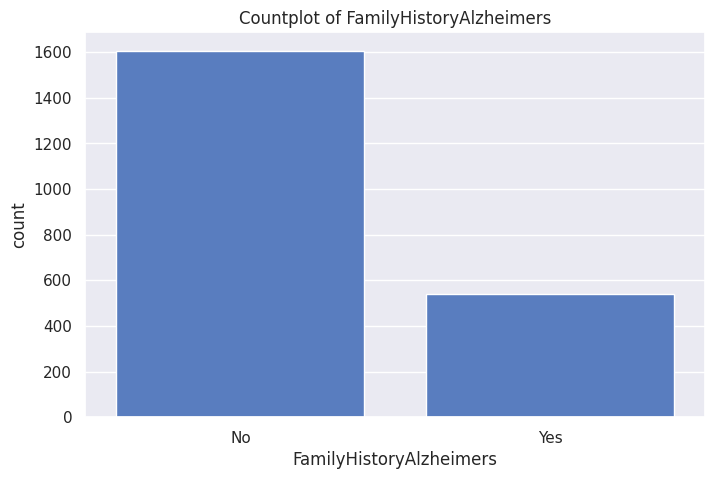

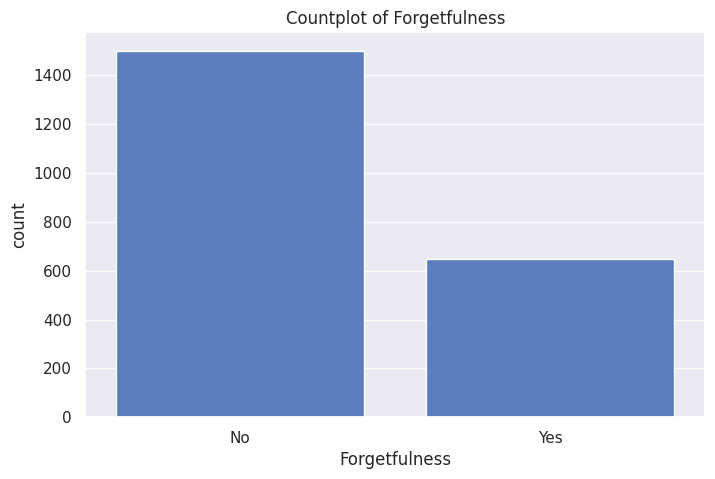

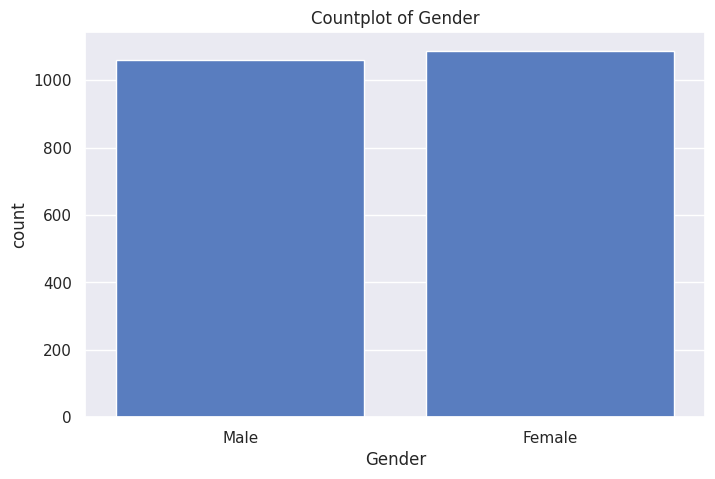

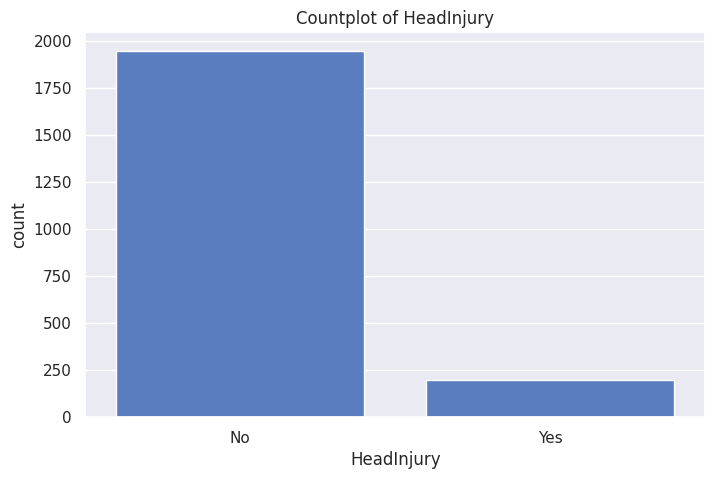

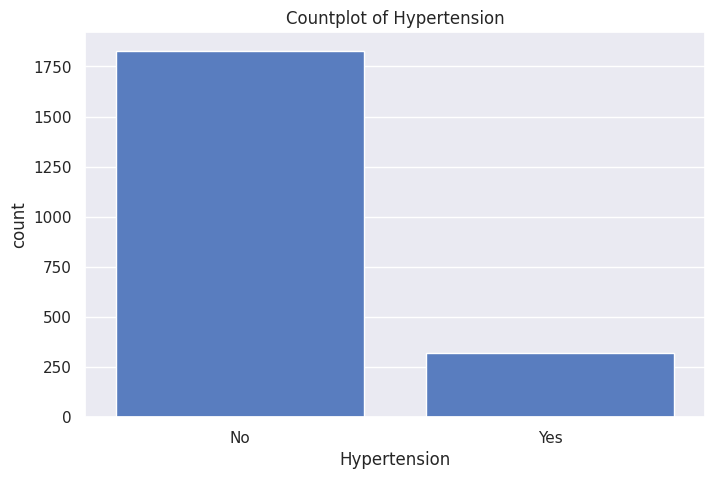

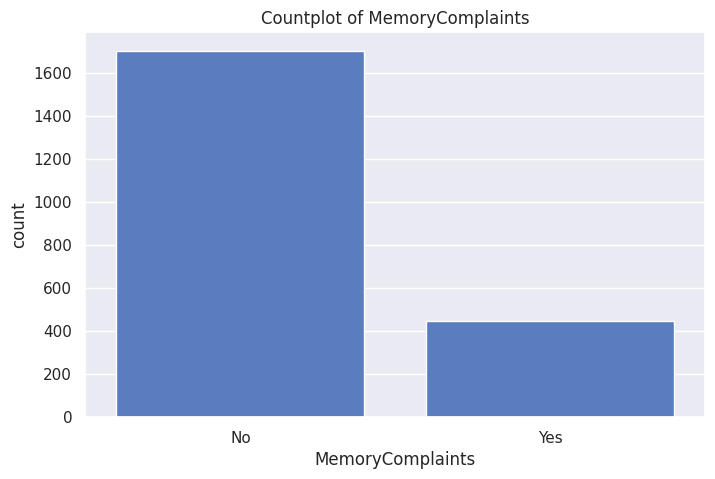

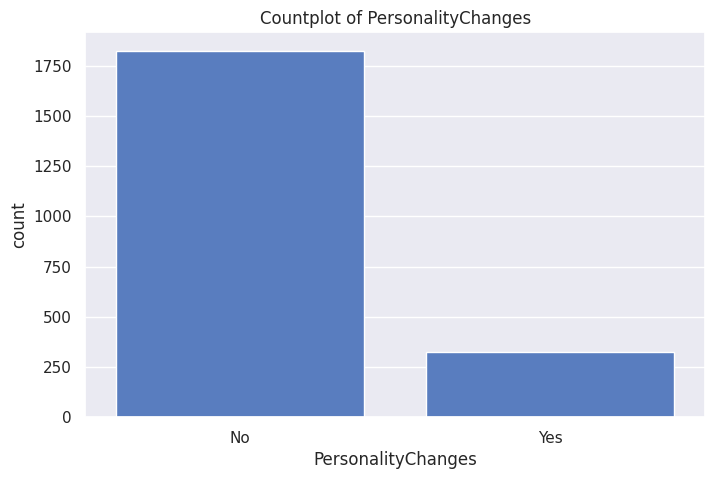

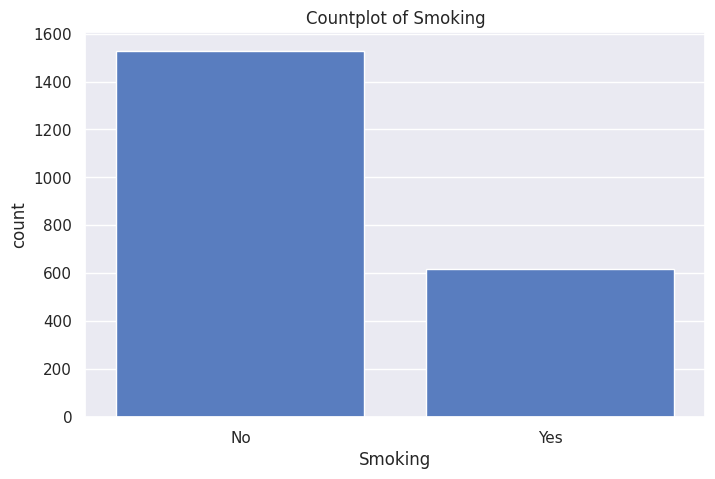

In [13]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=column)
    plt.title(f'Countplot of {column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

#####Distribution of Numerical Features

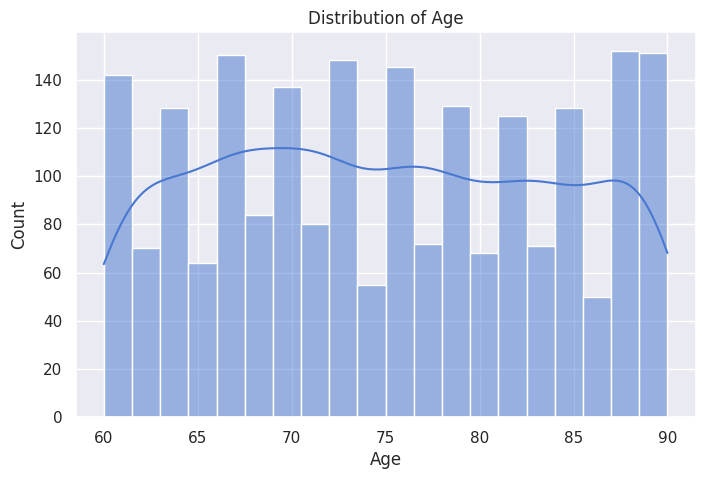

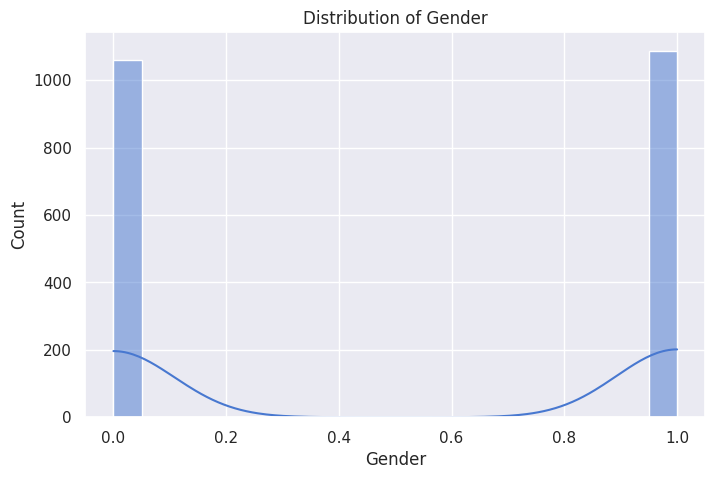

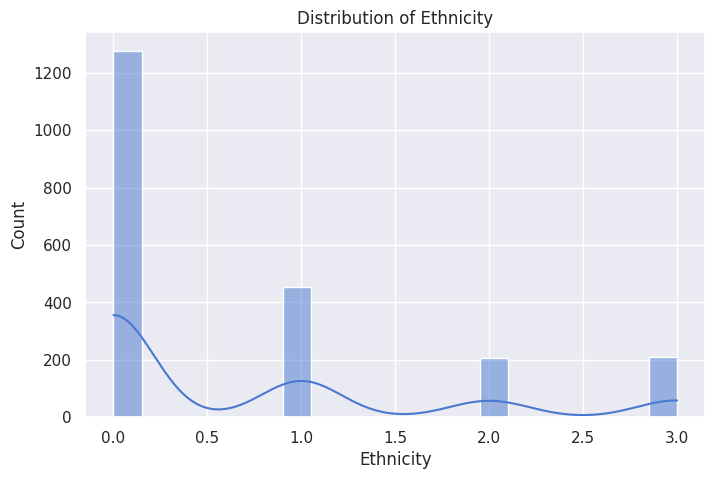

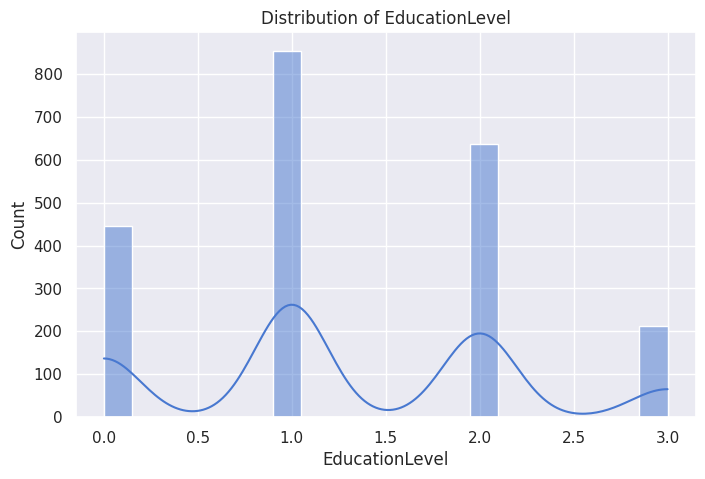

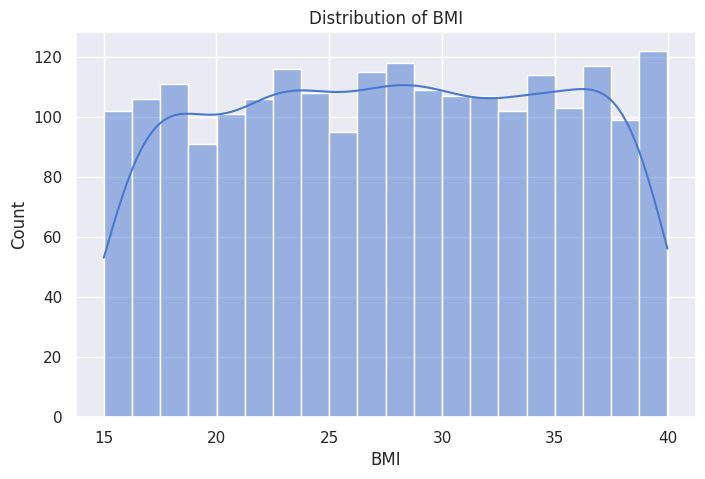

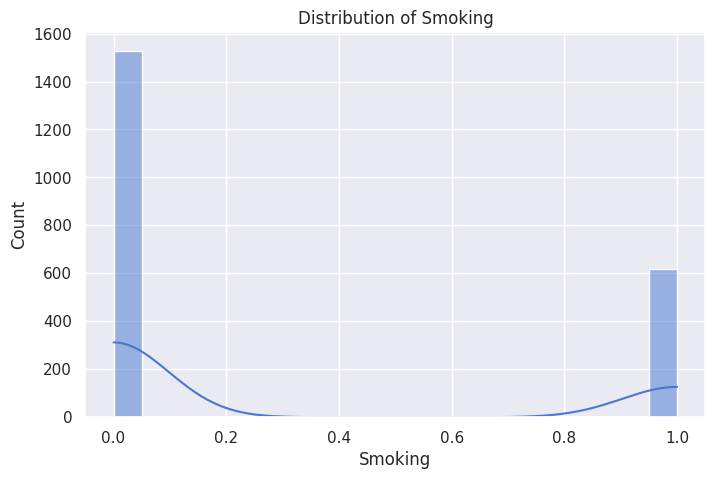

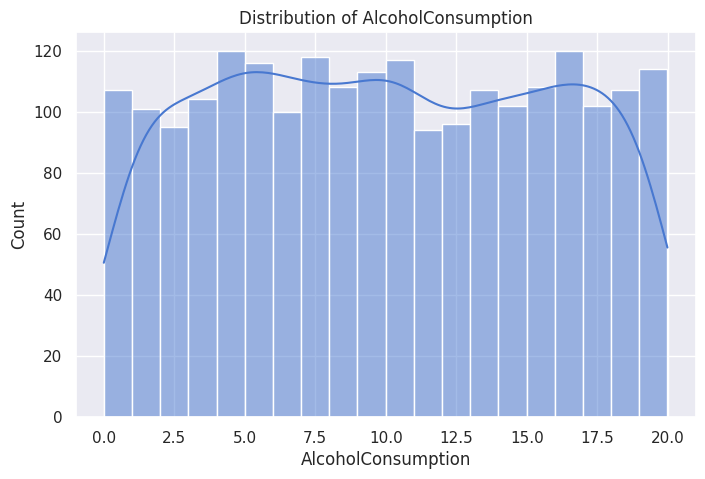

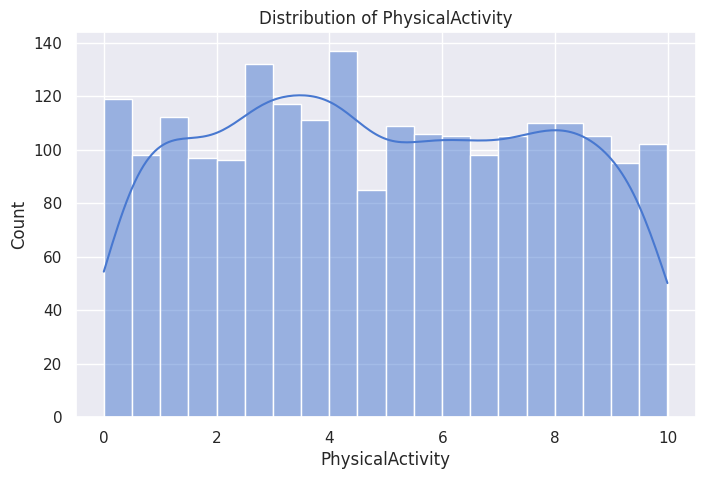

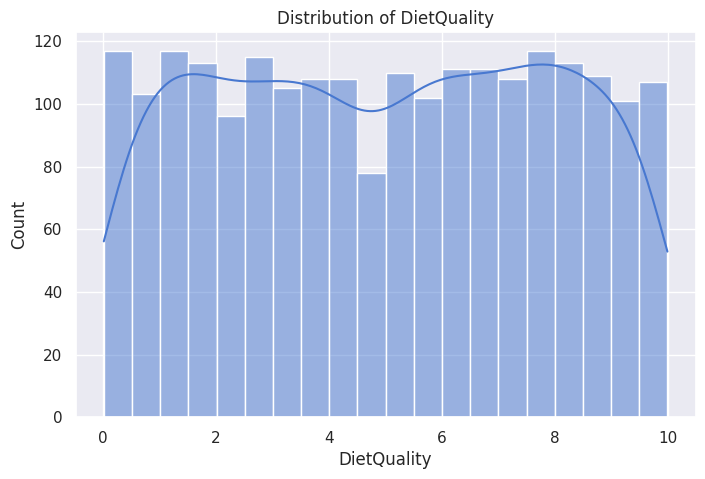

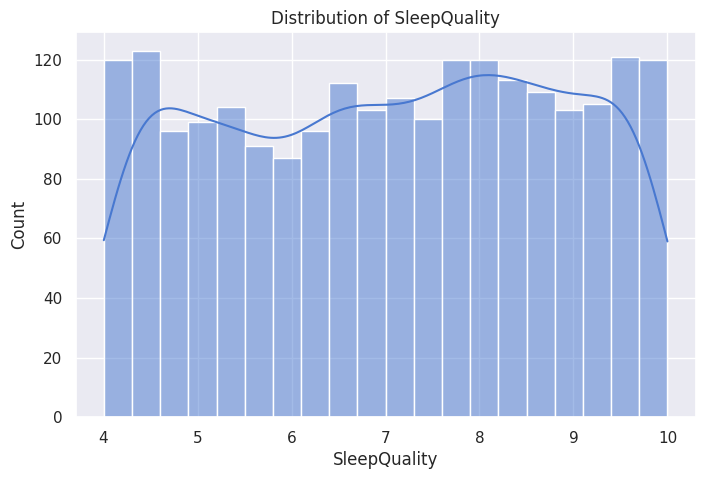

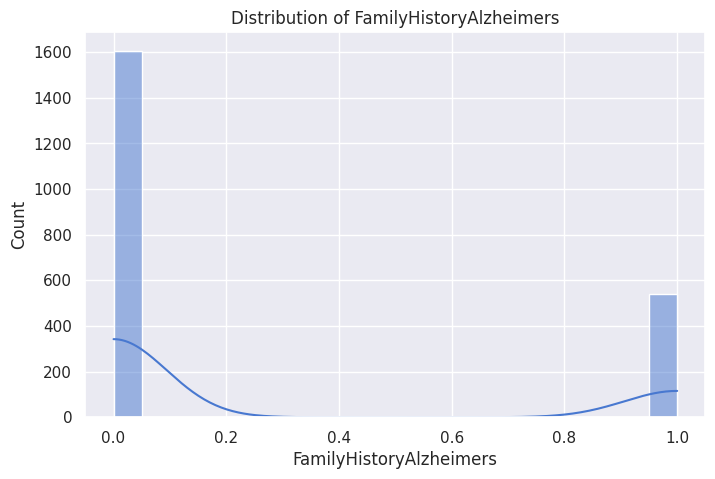

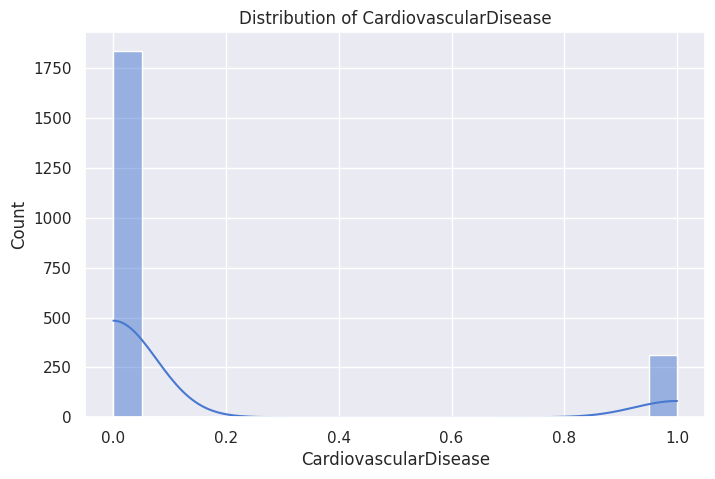

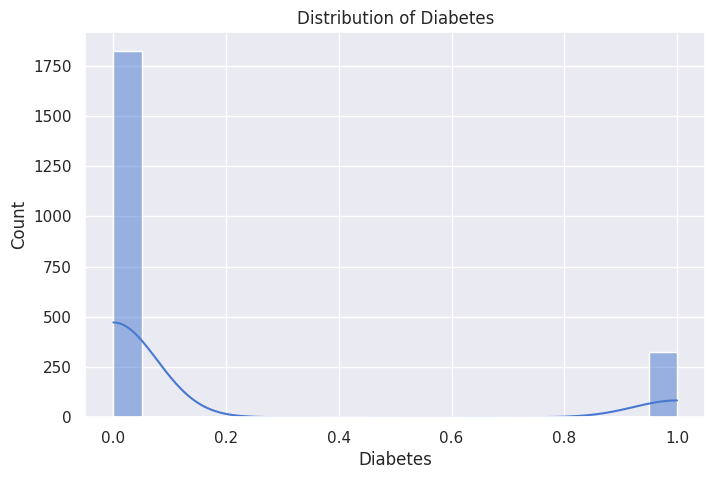

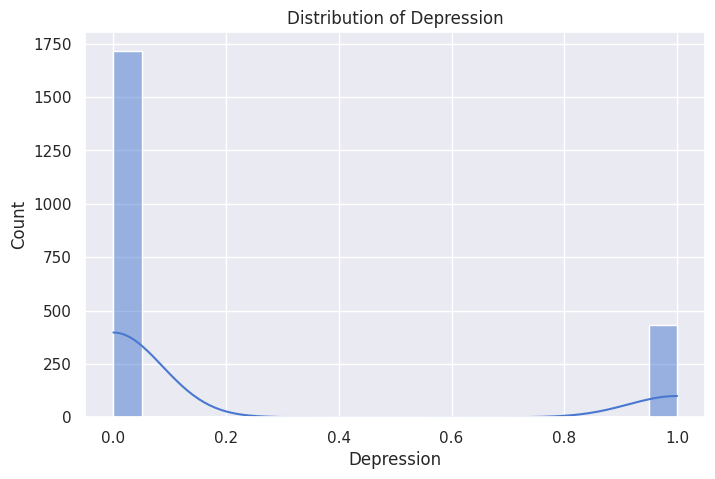

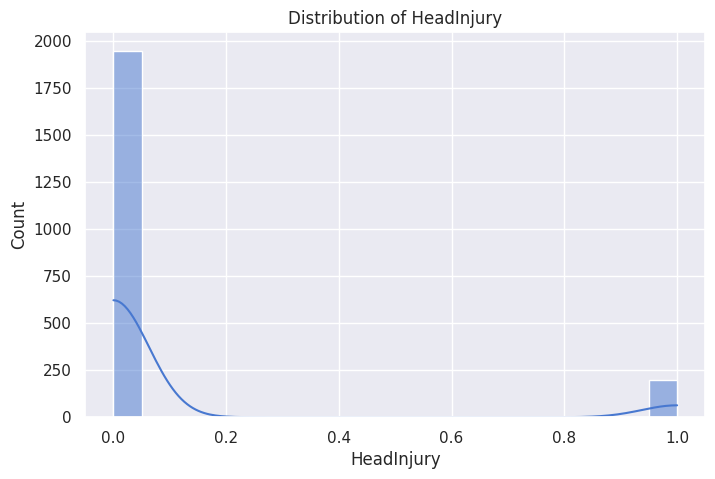

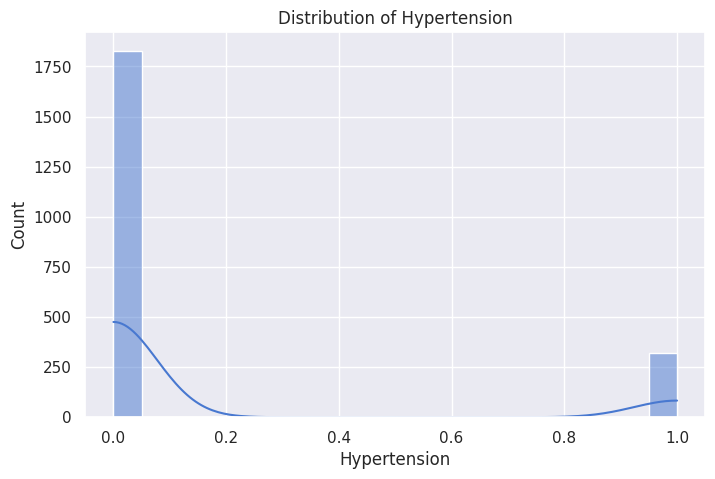

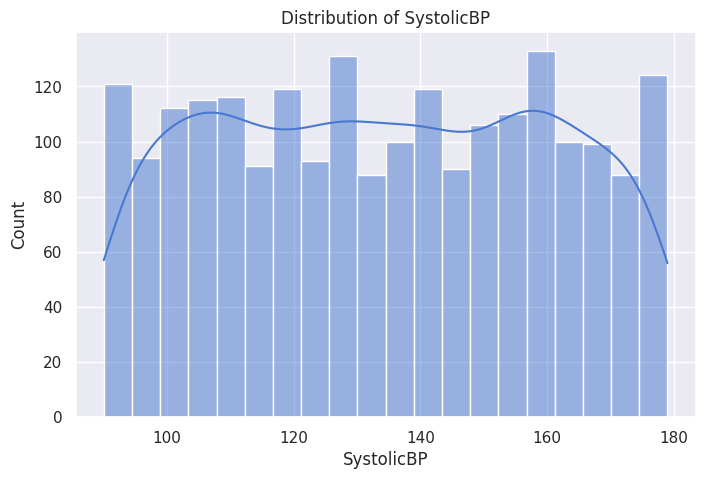

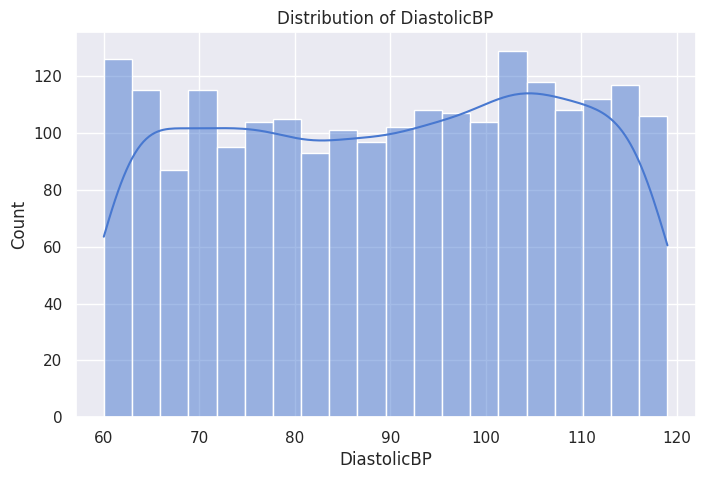

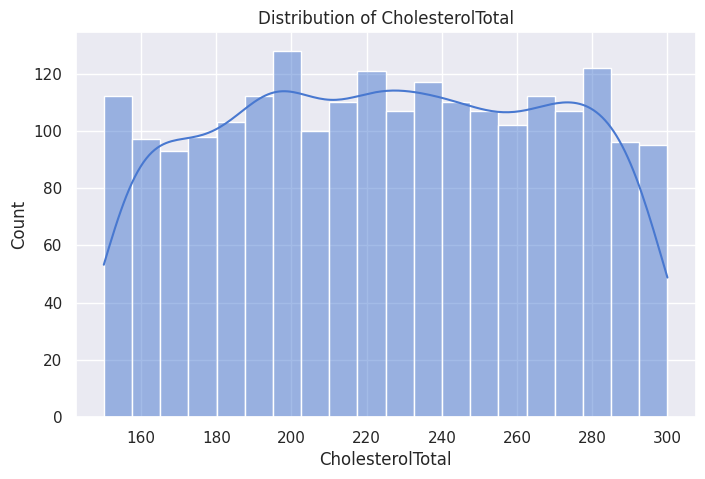

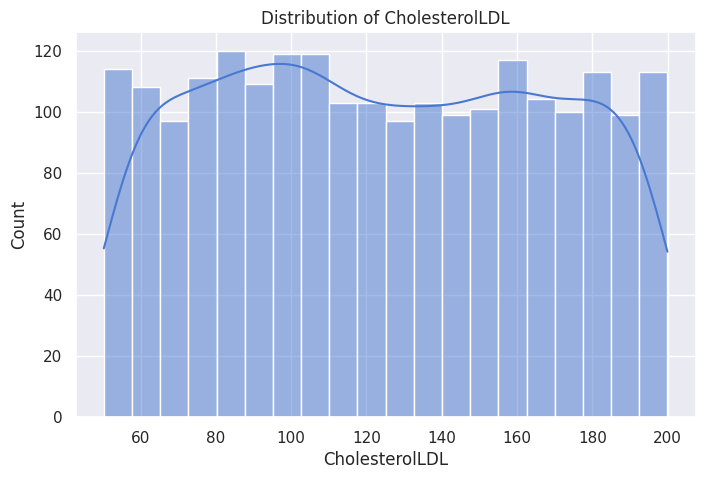

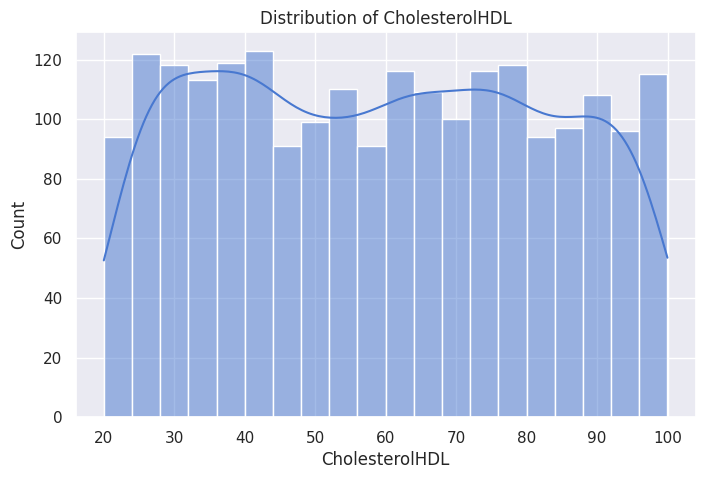

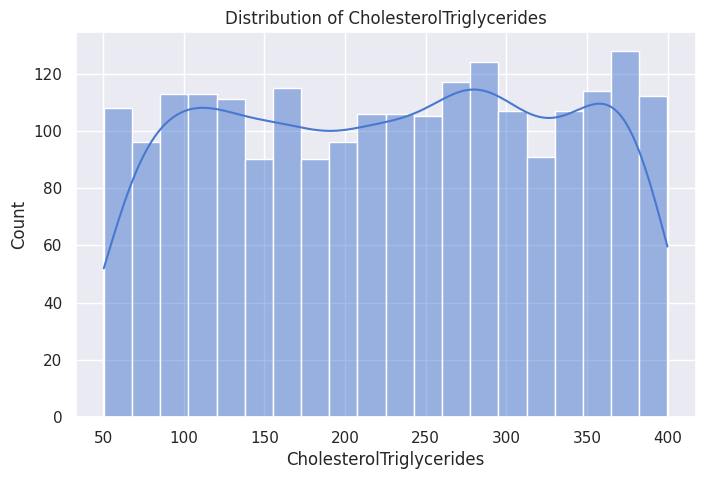

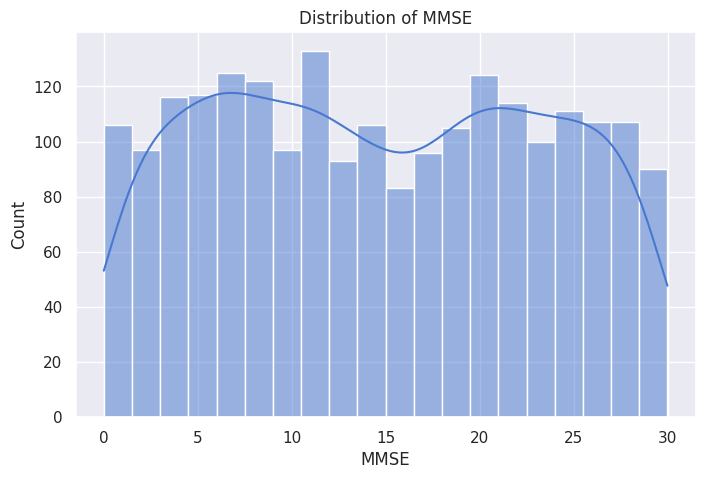

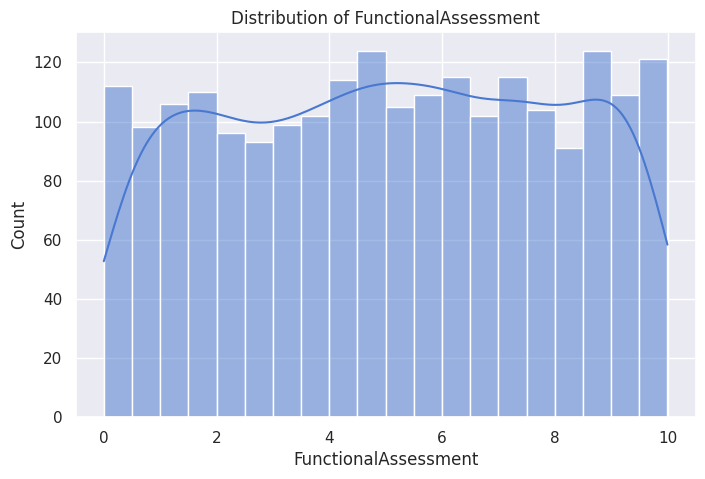

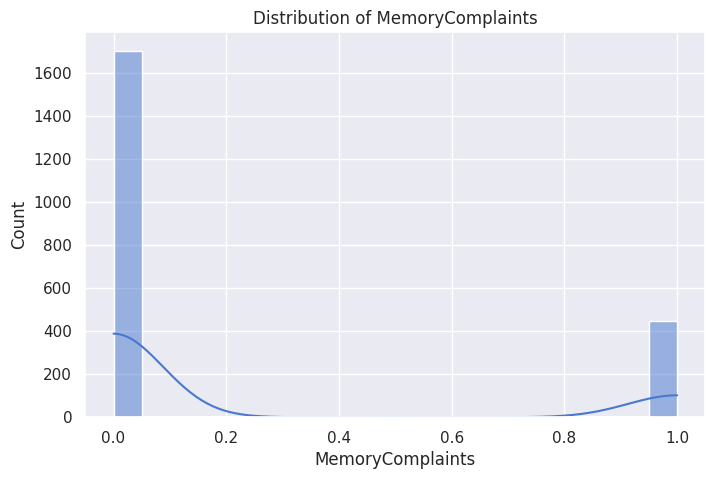

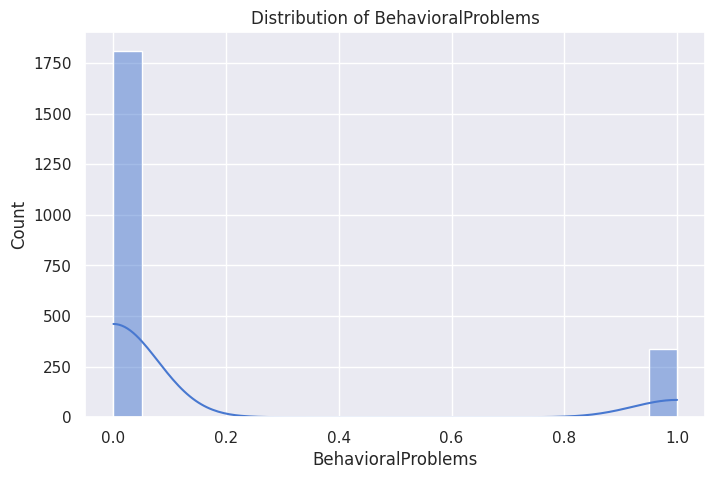

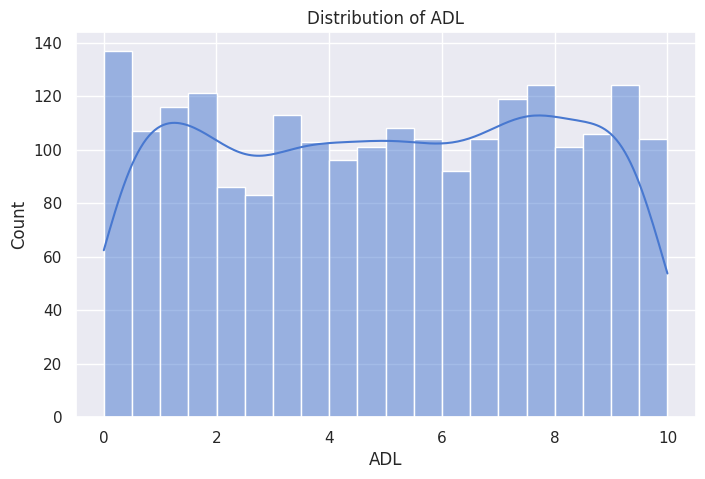

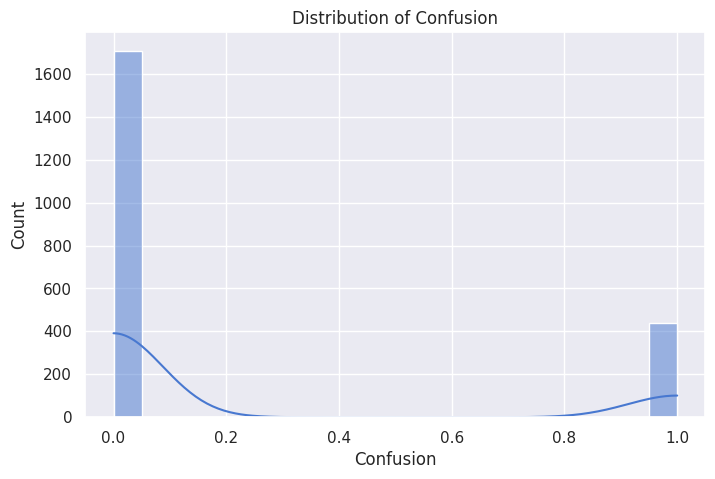

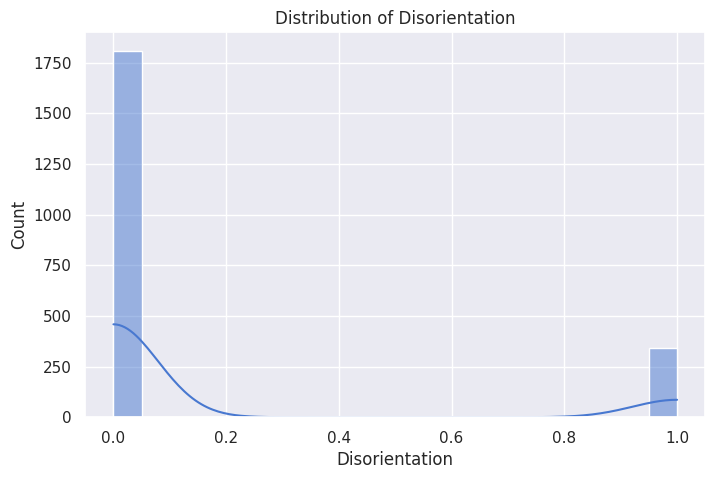

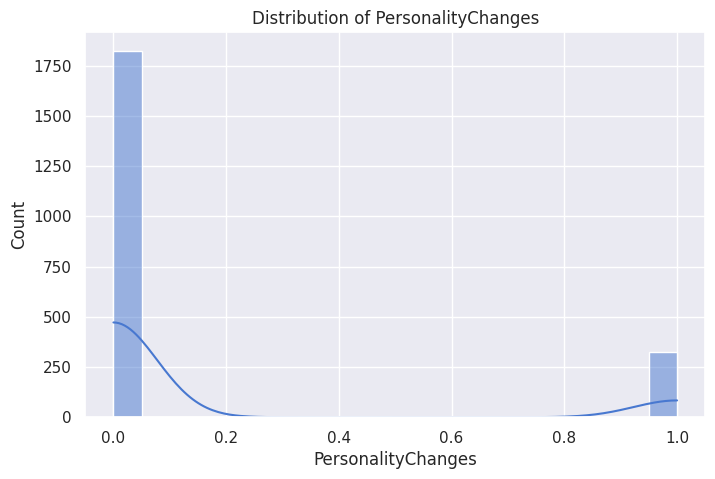

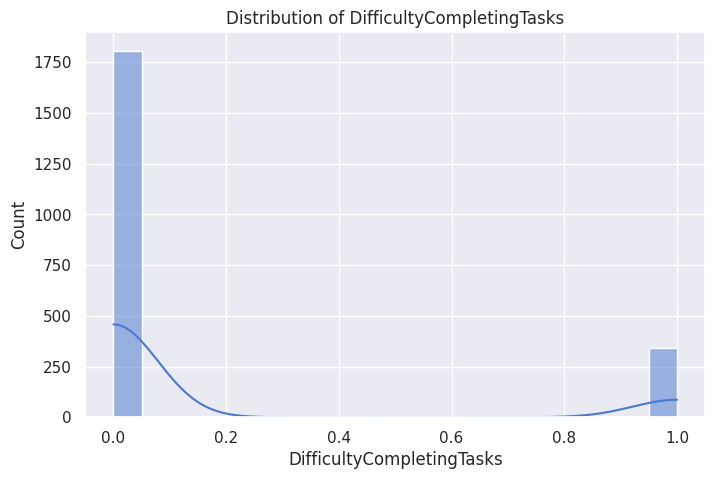

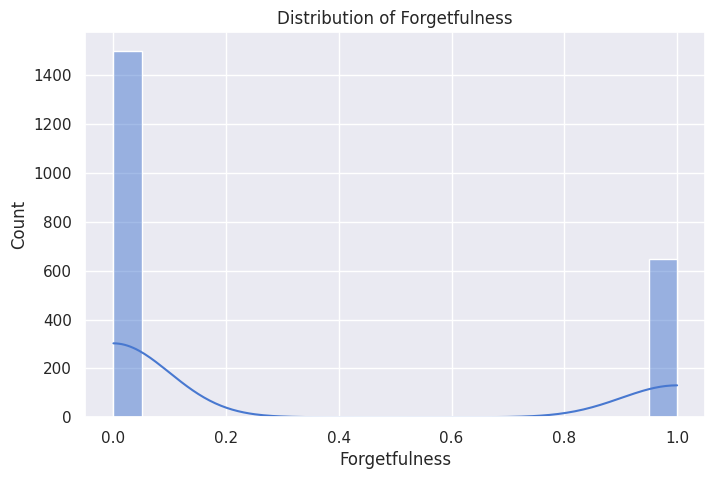

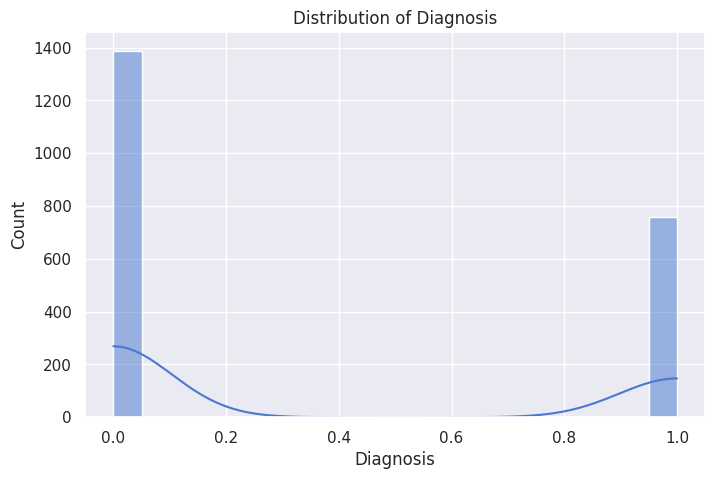

In [14]:
# Plot histogram for each numerical column
for column in data:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

#####Exploring Correlations

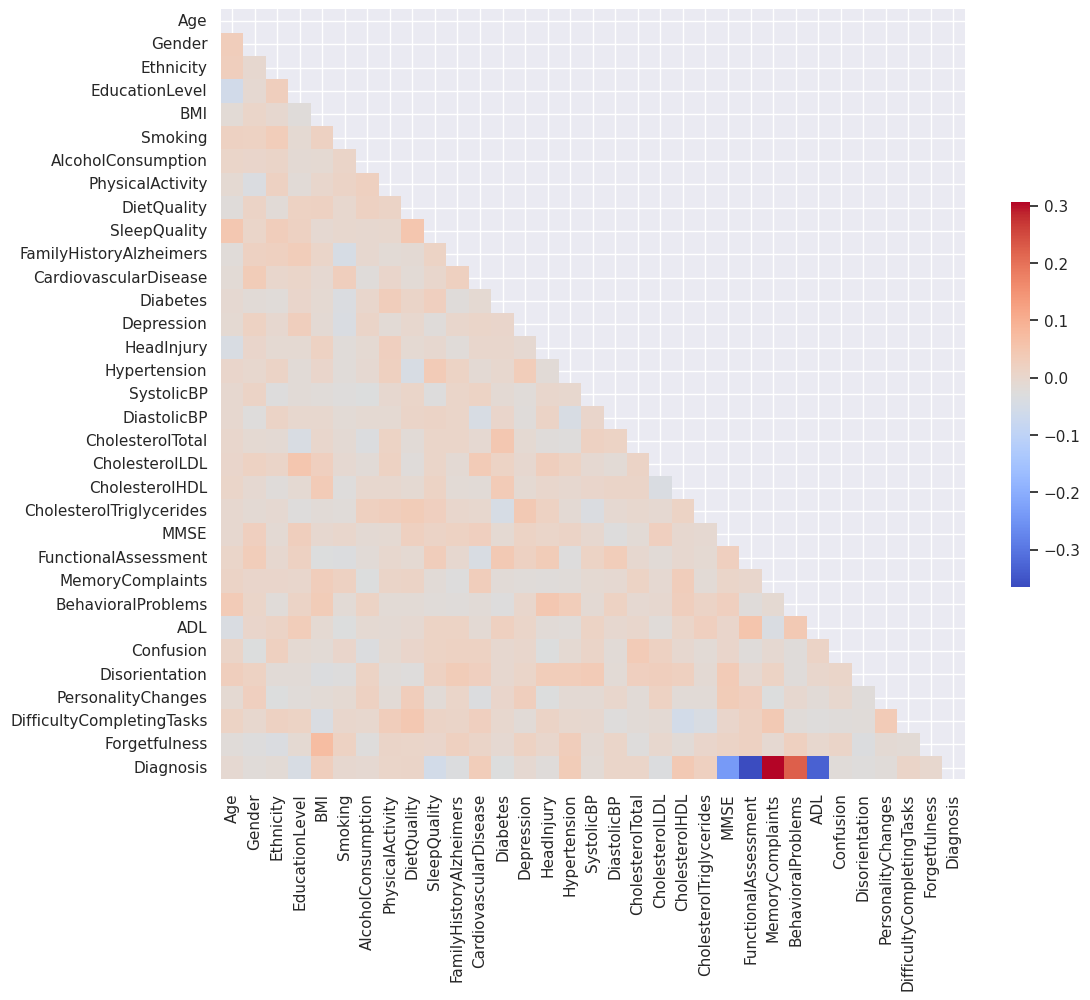

In [15]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

The heatmap reveals that the features do not have any strong correlations among themselves. However, there are five columns that show a correlation with the target variable.

Let's calculate Pearson correlation coefficient, also known as Pearson's r. It is a measure of the linear relationship between two variables. It quantifies the degree to which a pair of variables are linearly related, ranging from -1 to 1.

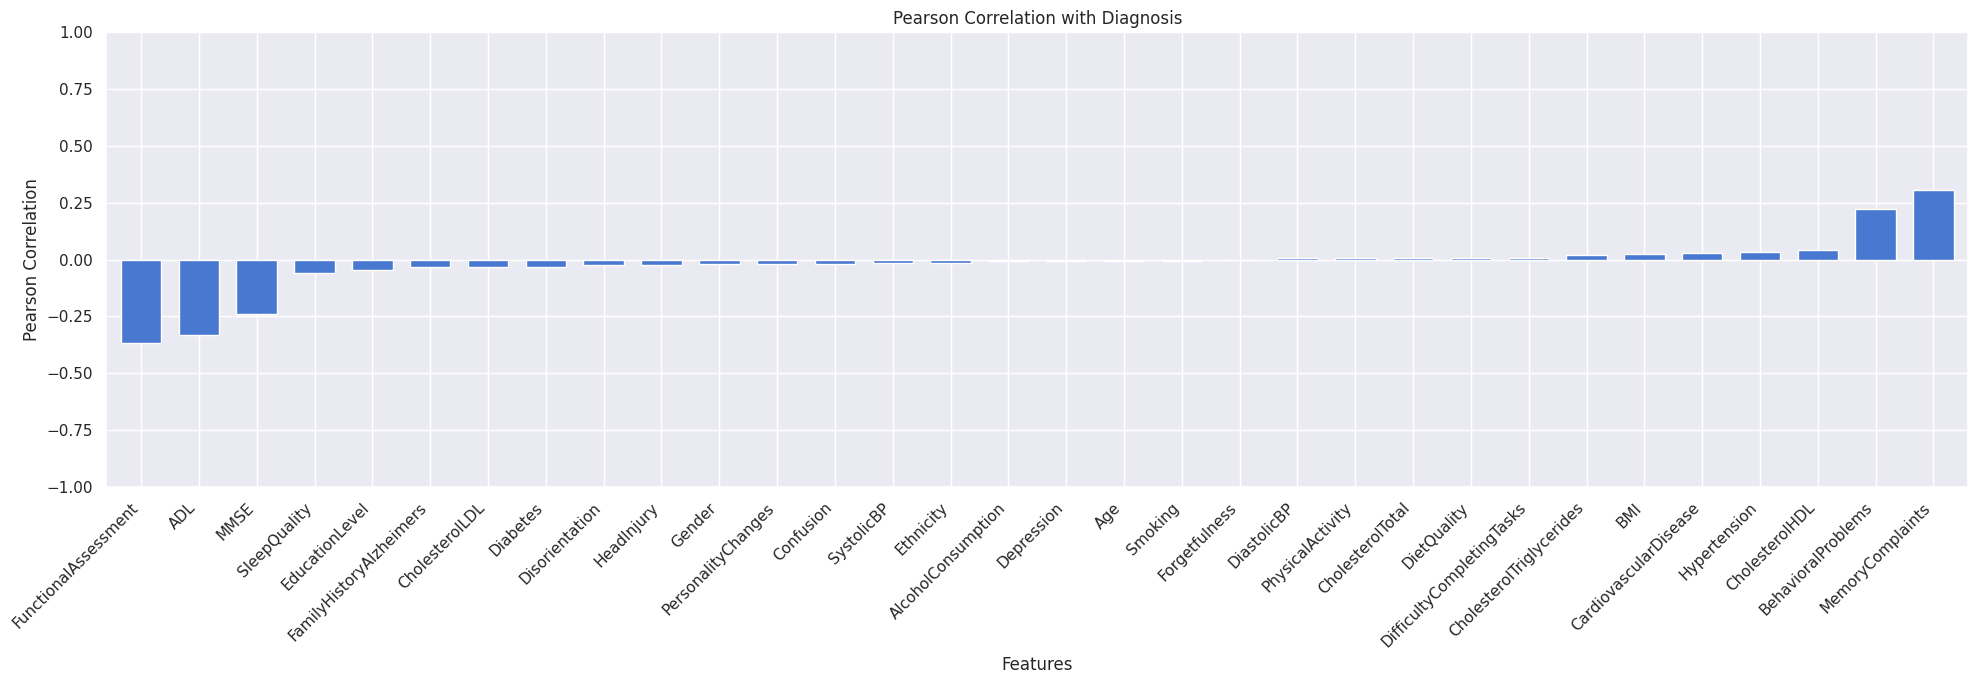

In [16]:
# Compute Pearson correlation coefficients
correlations = data.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Diagnosis')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

And now let's plot the distribution of the most correlated columns across different 'Diagnosis' categories.

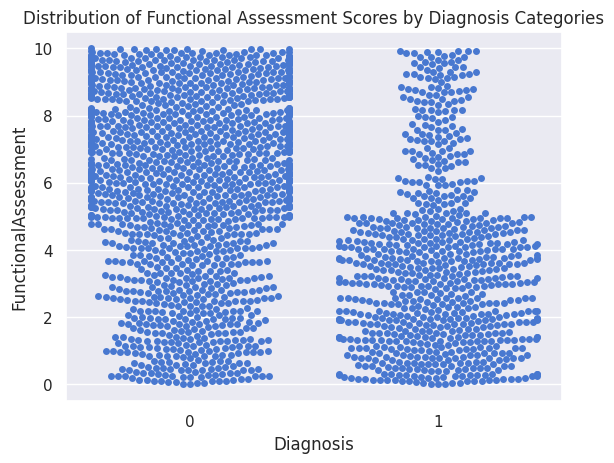

In [17]:
sns.swarmplot(data=data, y='FunctionalAssessment', x='Diagnosis')
plt.title(f'Distribution of Functional Assessment Scores by Diagnosis Categories')
plt.show()

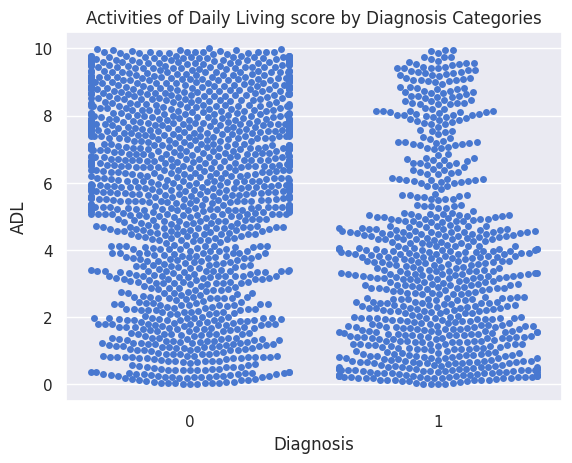

In [18]:
sns.swarmplot(data=data, y='ADL', x='Diagnosis')
plt.title(f'Activities of Daily Living score by Diagnosis Categories')
plt.show()

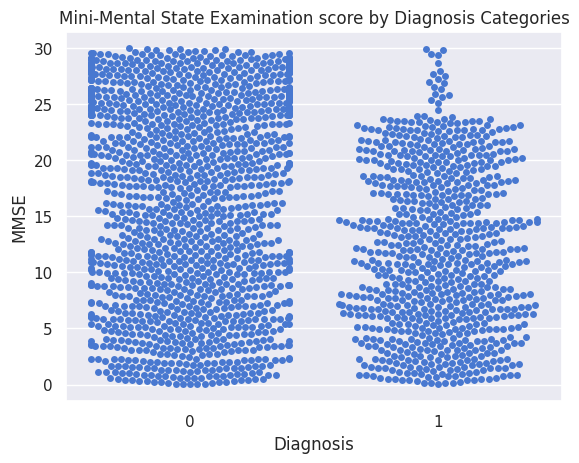

In [19]:
sns.swarmplot(data=data, y='MMSE', x='Diagnosis')
plt.title(f'Mini-Mental State Examination score by Diagnosis Categories')
plt.show()

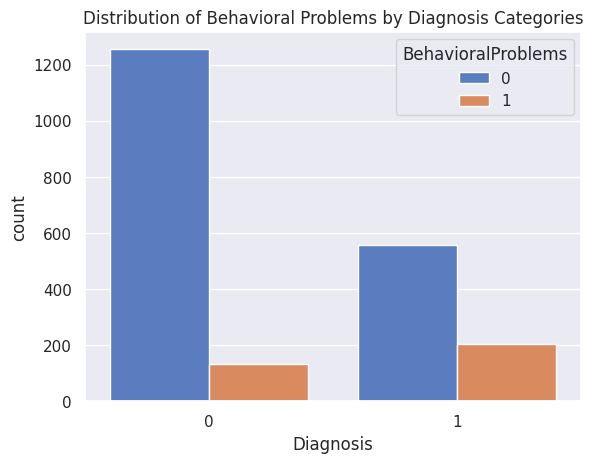

In [20]:
sns.countplot(data=data, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

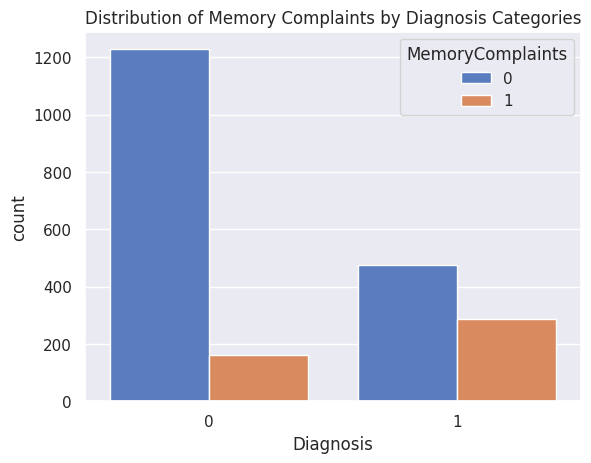

In [21]:
sns.countplot(data=data, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

Observations from Exploring Correlations
As observed, there are five columns correlated with the target variable.
Three numerical features—`Functional Assessment`, `ADL` (Activities of Daily Living), and `MMSE` (Mini-Mental State Examination)—are negatively correlated with the `diagnosis of Alzheimer's disease`, with correlation coefficients of -0.36, -0.33, and -0.24 respectively. This indicates that lower scores in these assessments are associated with a higher likelihood of an Alzheimer's diagnosis.
Additionally, two categorical variables—`Behavioral Problems` and `Memory Complaints`—are positively correlated with the `diagnosis`, with correlation coefficients of 0.22 and 0.30 respectively. This means the presence of these issues is associated with a higher likelihood of an Alzheimer's diagnosis, highlighting their significance in the diagnostic process.

#####Distribution of a Target Variable

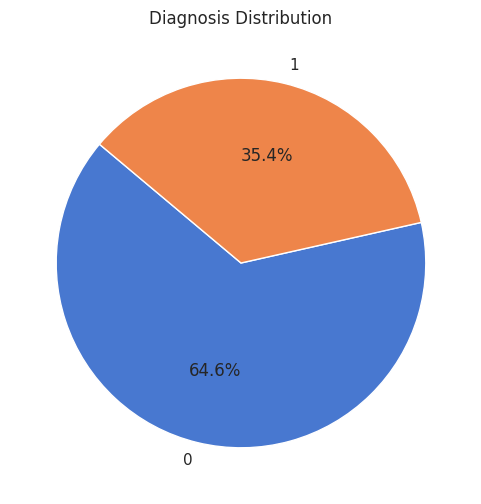

In [22]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = data.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

Observation from the Target Distribution
Our target variable is moderately imbalanced, with 65% of instances being 0 and 35% being 1.

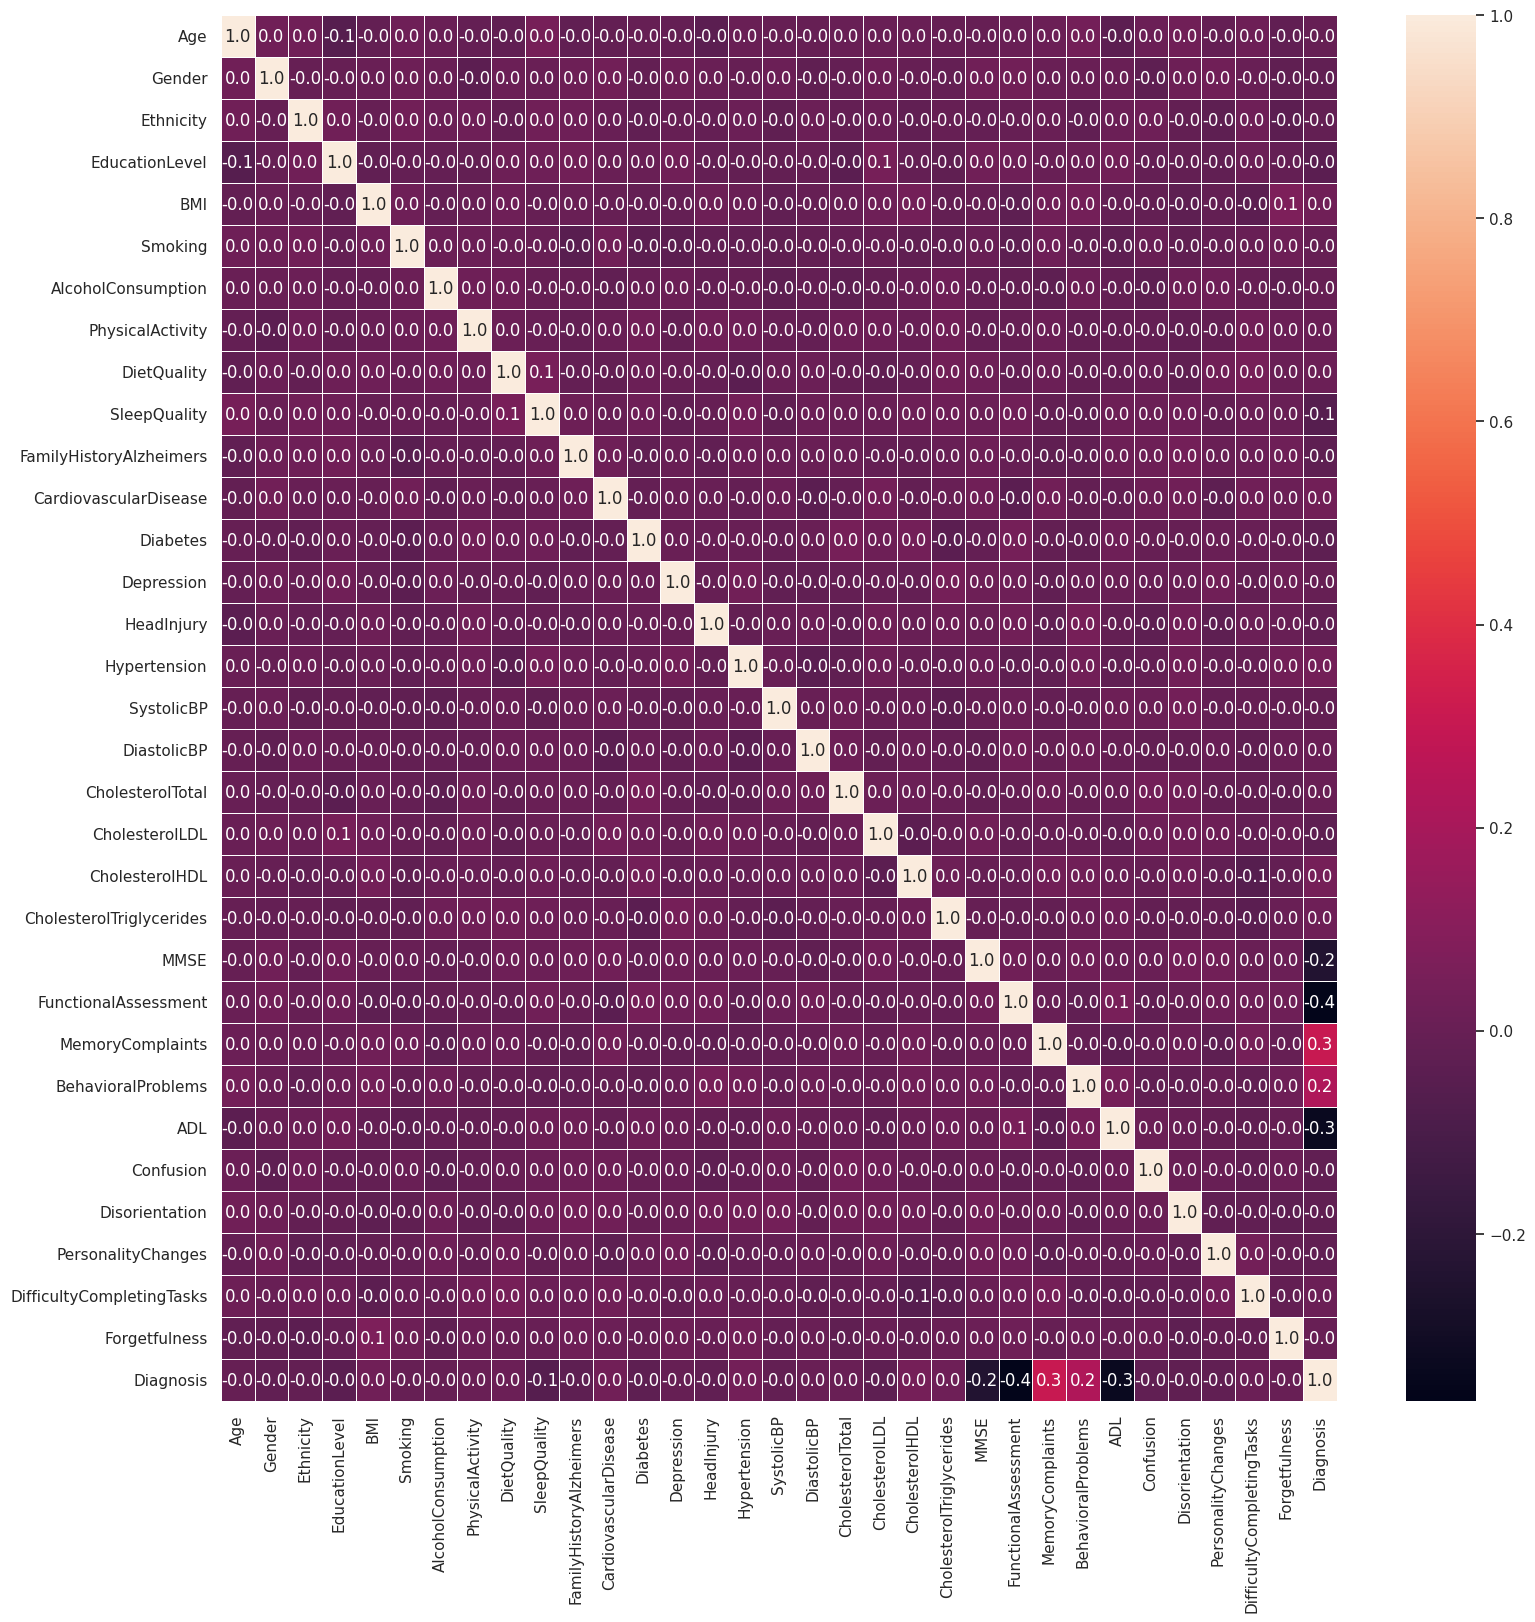

In [23]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Divide the dataset

#####Divide the dataset into independent and dependent

In [24]:
#split data into features and target
X = data.drop(columns = ['Diagnosis'])
y = data['Diagnosis']

In [25]:
#split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

## Modeling

In [26]:
#define hyperparameter grids for each model
param_grids = {
    'Decision Tree': {'max_depth': [3, 5, 7, 12, None]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 12, None]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

#instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#fit models using GridSearchCV for hyperparameter tuning
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv = 5, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\nBest Parameters: {grid_search.best_params_}\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.92      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

Best Parameters: {'max_depth': 5}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       277
           1       0.96      0.86      0.91       153

    accuracy                           0.94       430
   macro avg       0.95      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430

Best Parameters: {'max_depth': None, 'n_estimators': 100}

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       277
           1       0.36   